### Student Information
Name: 薛揚

Student ID: 113062615

GitHub ID: Hsueh008

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Read Dataset

In [1]:
### Begin Assignment Here
import pandas as pd

YTC = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

def f(x):
    if x == 'not nostalgia':
        return 'not-nostalgia'
    else :
        return x

YTC['sentiment']= YTC['sentiment'].apply(lambda x: f(x))
YTC.head()

,sentiment,comment
0,not-nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not-nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


In [2]:
print(YTC.columns)

Index(['sentiment', 'comment'], dtype='object')


# Data Preparation

In [3]:
# Find the null values in the dataset
print(YTC.isnull().sum())

sentiment    0
comment      0
dtype: int64


In [4]:
# Find the duplicate values in the dataset
print(f"Number of duplicate values in the dataset: {YTC.duplicated().sum()}")

Number of duplicate values in the dataset: 1


In [5]:
# Drop the duplicate values in the dataset
YTC.drop_duplicates(inplace=True)
print(f"Number of duplicate values in the dataset: {YTC.duplicated().sum()}")

Number of duplicate values in the dataset: 0


# Data preprocessing

In [6]:
# Convert all the comments to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
YTC_counts = count_vect.fit_transform(YTC.comment)
print(YTC_counts) # <--- First comment in the dataset

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31249 stored elements and shape (1499, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (1498, 2254)	2
  (1498, 1798)	1
  (1498, 3704)	2
  (1498, 1923)	1
  (1498, 3300)	3
  (1498, 3044)	2
  (1498, 1026)	1
  (1498, 2699)	1
  (1498, 3504)	1
  (1498, 1308)	1
  (1498, 208)	2
  (1498, 516)	1
  (1498, 637)	1
  (1498, 78)	1
  (1498, 1132)	1
  (1498, 863)	1
  (1498, 603)	2
  (1498, 3637)	1
  (1498, 1049)	1
  (1498, 87)	1
  (1498, 2027)	1
  (1498, 2089)	1
  (1498, 998)	1
  (1498, 3414)	1
  (1498, 2779)	1


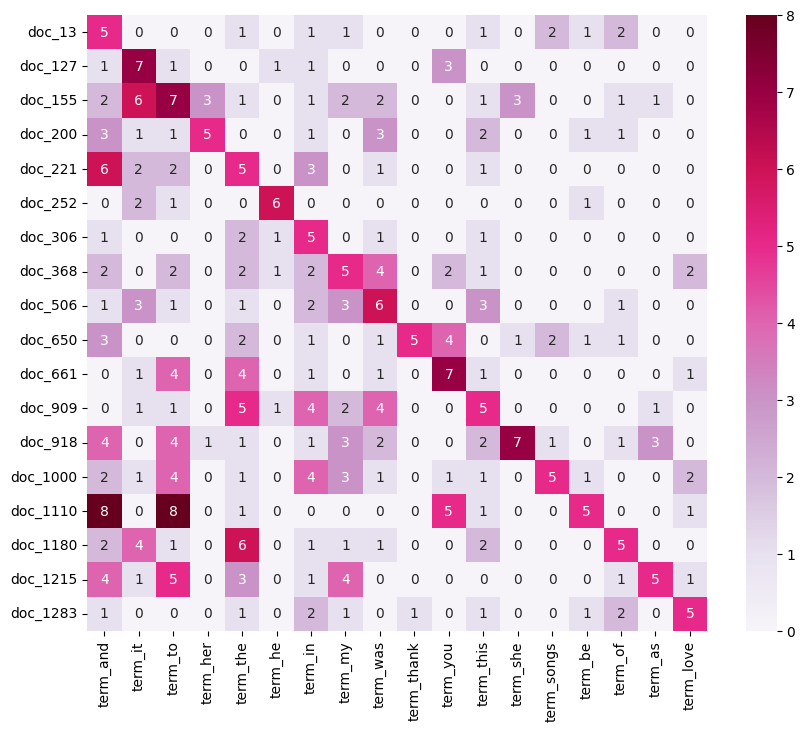

In [7]:
# Heat map of 20 comments with a 
import matplotlib.pyplot as plt
import seaborn as sns
plot_x = []
plot_y = []
word_indices = []
doc_indices = []

# 建立 plot_x, plot_y <-- 用來記錄要繪製的x, y軸的標籤
# 建立 word_indices, doc_indices <-- 用來記錄已經被選過的字詞和文件
for doc_idx, doc in enumerate(YTC_counts.toarray()):
    for word_idx, word_freq in enumerate(doc):
        if word_freq >= 5: # 這裡可以調整出現次數的門檻
            token = count_vect.get_feature_names_out()[word_idx]
            if word_idx in word_indices: # 如果這個字詞已經被選過了就跳過
                continue
            plot_x.append("term_" + str(token))
            plot_y.append("doc_" + str(doc_idx))
            word_indices.append(word_idx)
            doc_indices.append(doc_idx)
            break
    if len(plot_x) >= 20:
        break

# 建立 plot_z
plot_z = YTC_counts[doc_indices][:, word_indices].toarray()

# 繪圖
maYTC_index = plot_z.max()
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=maYTC_index, annot=True, fmt='g')
plt.show()

In [8]:
# Count the frequency of each word in the dataset
import numpy as np
YTC_freq = np.sum(YTC_counts.toarray(), axis=0)

# Print the frequency of first 20 words
for i, freq in enumerate(YTC_freq[:20]):
    print(f"{count_vect.get_feature_names_out()[i]}: {freq}")

00: 1
000: 2
045: 1
07: 2
10: 16
100: 5
10m: 1
11: 8
11th: 1
12: 11
13: 8
14: 15
15: 10
150: 2
16: 12
16years: 1
17: 13
17th: 1
18: 9
19: 6


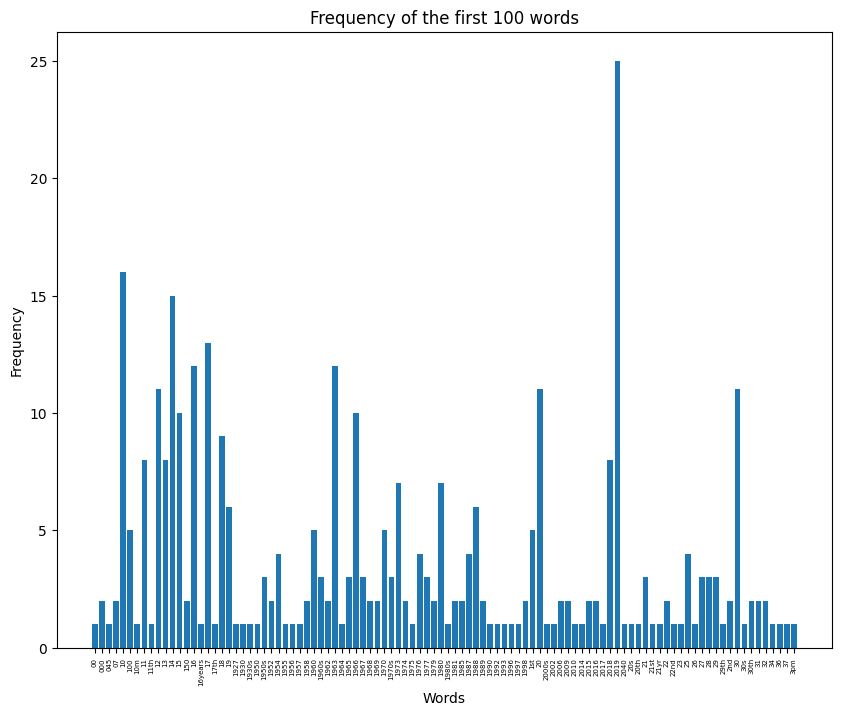

In [9]:
# Plot the frequency of the first 100 words.
start, end = 0, 100

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(count_vect.get_feature_names_out()[start:end], YTC_freq[start:end], )
ax.xaxis.set_tick_params(rotation=90, labelsize=5)
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of the first 100 words")
plt.show()

In [10]:
# Plot the long tail of the log frequency of words
import plotly.express as px
import math

YTC_freq_log = [math.log(i) for i in YTC_freq]
df = pd.DataFrame({"word": count_vect.get_feature_names_out(), "freq": YTC_freq_log})
sorted_df_YTC_freq = df.sort_values(by="freq", ascending=False)

fig = px.bar(
    sorted_df_YTC_freq,
    x="word",
    y="freq",
    title="Long Tail Distribution of Log Frequency of Words",
)
fig.update_layout(
    xaxis_title="Words",
    yaxis_title="Log Frequency",
)
fig.show()

# Extract the Frequency pattern

In [11]:
# Extract each sentiment df from the dataset
sentiments = YTC["sentiment"].unique()

df_sentiments = {}
for sentiment in sentiments:
    df_sentiments[sentiment] = YTC[YTC["sentiment"] == sentiment]

def create_term_document_df(df):
    count_vect = CountVectorizer()
    YTC_counts = count_vect.fit_transform(df["comment"])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(YTC_counts.toarray(), columns=words)
    
    return term_document_df

filt_term_document_dfs = {}
for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(df_sentiments[sentiment])

filt_term_document_dfs['nostalgia'].head()

,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


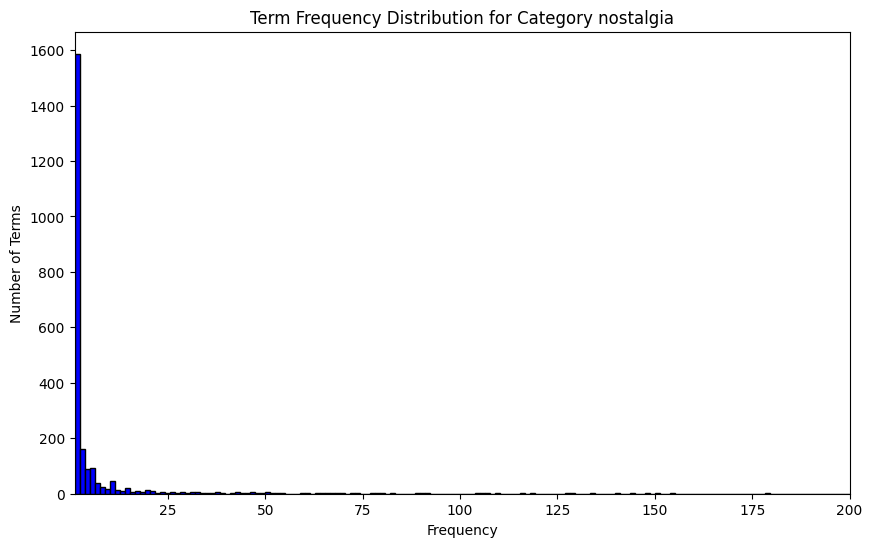

In [12]:
sentiment = 'nostalgia'
word_counts = filt_term_document_dfs[sentiment].sum(axis=0).to_numpy()
 
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiment}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [13]:
sentiment = 'nostalgia'
word_counts = filt_term_document_dfs[sentiment].sum(axis=0).to_numpy()
top_percentage = 0.02

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_percent_index = int(top_percentage * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment].iloc[:, i].name for i in top_5_percent_indices]

print(f"Sentiment: {sentiment}")
print(f"Number of terms in top {top_percentage * 100}%: {top_percent_index}")
print(f"Filtered terms: {filtered_words}")
print(sorted_counts[:top_percent_index])


Sentiment: nostalgia
Number of terms in top 2.0%: 45
Filtered terms: ['the', 'my', 'this', 'to', 'and', 'song', 'was', 'of', 'in', 'it', 'me', 'back', 'memories', 'when', 'so', 'years', 'that', 'on', 'love', 'for', 'time', 'you', 'remember', 'old', 'with', 'is', 'music', 'great', 'brings', 'we', 'beautiful', 'as', 'all', 'now', 'but', 'days', 'at', 'good', 'miss', 'songs', 'childhood', 'reminds', 'her', 'from', 'still']
[643 566 545 543 472 440 432 361 349 318 300 272 240 226 179 154 150 148
 144 140 134 129 127 119 116 110 107 106 104  92  90  89  83  82  82  80
  79  79  79  78  77  74  74  74  72]


In [14]:
sentiment = 'not-nostalgia'
word_counts = filt_term_document_dfs[sentiment].sum(axis=0).to_numpy()
bottom_percentage = 0.1

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_percent_index = int(bottom_percentage * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiment}")
print(f"Number of terms in bottom {bottom_percentage * 100}%: {bottom_percent_index}")
print(f"Filtered terms: {filtered_words}")
print(sorted_counts[:bottom_percent_index])

Category: not-nostalgia
Number of terms in bottom 10.0%: 260
Filtered terms: ['12', '16years', 'zealand', 'sensitive', 'sense', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn', '1998', 'measure', 'spine', 'spewing', '2040', '2018', '2017', '2010', '1957', '1955', '1952', '1930s', '1930', '17th', '1989', 'yuo', '1987', '1981', '00', '1960s', '76', '74', '67', '64', '53', '500', '4th', '47', '42', '40s', '400', '37', '32', '30th', '30s', '28', 'accent', 'abroad', 'ability', 'section', 'seconds', 'searched', 'search', 'sea', 'scruffy', 'scottie', 'schedule', 'scene', 'scared', 'scan', 'abandant', '95', 'worlds', 'working', 'worked', 'woo', 'wondering', 'wonderfully', 'adam', 'adaline', 'actresses', 'actor', 'action', 'act', 'across', 'accurate', 'accident', 'accepting', 'afterwords', 'afternoon', 'affluence', 'affair', 'advice', 'adults', 'ads', 'adore', 'adorable', 'adele', 'adds', 'additional', 'addition', 'worthwhile', 'worst', 'worldwide', 'saying', 'sayer', 'saturday'

In [15]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment}, we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment], top_percent=top_percentage, bottom_percent=bottom_percentage)

term_document_dfs['nostalgia']


For sentiment not-nostalgia, we filter the following words:
Bottom 10.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
            ..
beating      1
billions     1
billion      1
billboard    1
bike         1
Length: 260, dtype: int64
Top 2.0% words: 
now           55
never         55
know          55
no            58
good          59
always        59
are           60
at            60
his           63
from          65
when          73
they          74
will          75
she           76
her           79
time          79
as            82
beautiful     82
songs         82
just          84
voice         88
me            88
can           89
be            91
not           92
on            92
what          92
all           98
great        103
with         106
he           108
but          113
like         115
one          117
have         119
so           136
for          138
was          152
music        160
love         165
my           199
that         

,07,10,11,12,13,14,15,16,17,18,...,yes,yesterday,young,younger,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create the transactional database for each sentiment set
from PAMI.extras.DF2DB import DenseFormatDF as db

for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 745
Number of items : 2021
Minimum Transaction Size : 1
Average Transaction Size : 12.10469798657718
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 9.236914092691766
Variance in Transaction Sizes : 85.43526015732121
Sparsity : 0.9940105403332127


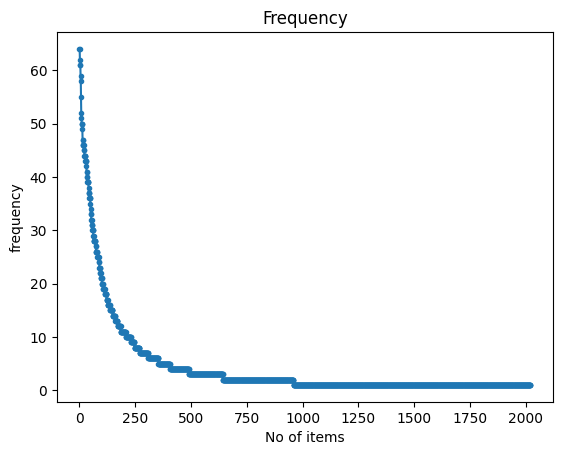

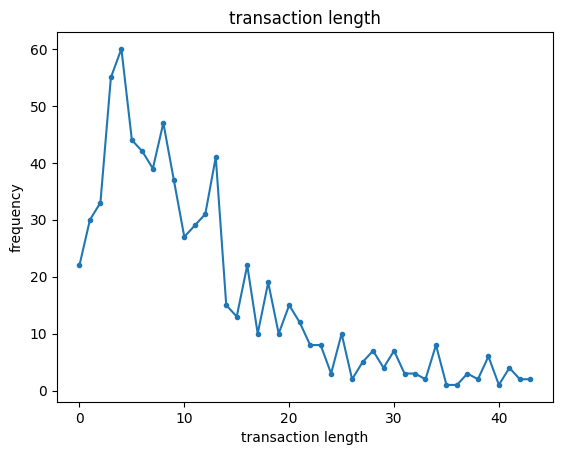

In [17]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 749
Number of items : 2290
Minimum Transaction Size : 1
Average Transaction Size : 11.535380507343124
Maximum Transaction Size : 51
Standard Deviation Transaction Size : 7.068642313836169
Variance in Transaction Sizes : 50.032503230689045
Sparsity : 0.994962715935658


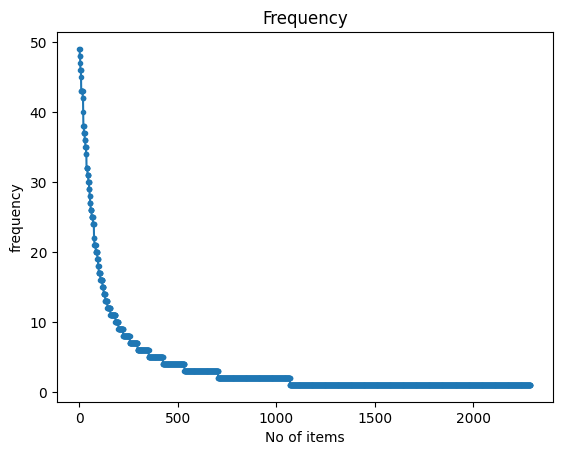

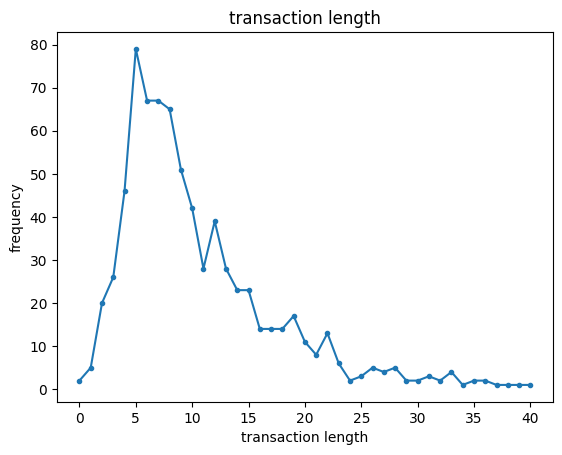

In [18]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not-nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [19]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save(f'freq_patterns_nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 323
Runtime: 0.05608987808227539


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
318,always,62
319,always have,9
320,have,64
321,just,64


In [20]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not-nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

obj2.save(f'freq_patterns_not-nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 234
Runtime: 0.03475522994995117


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
229,ever,47
230,really,48
231,about,48
232,who,49


In [21]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

        Patterns  Support
183         just       64
182         have       64
180       always       62
168           he       50
163         like       50
..           ...      ...
149   heard just        9
0         player        9
1           left        9
278  think about        9
279     only who        9

[281 rows x 2 columns]
Number of patterns discarded: 276


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
YTC_tdm = count_vect.fit_transform(YTC['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
YTC['tokenized_text'] = YTC['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=YTC.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = YTC['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(YTC_tdm.toarray(), columns=terms, index=YTC.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,his one,his voice,she just,can be,can first,heard just,player,left,think about,only who
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Dimensionality Reduction & Visualization

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# 2D dimensionality reduction using PCA, t-SNE, and UMAP
YTC_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
YTC_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
YTC_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

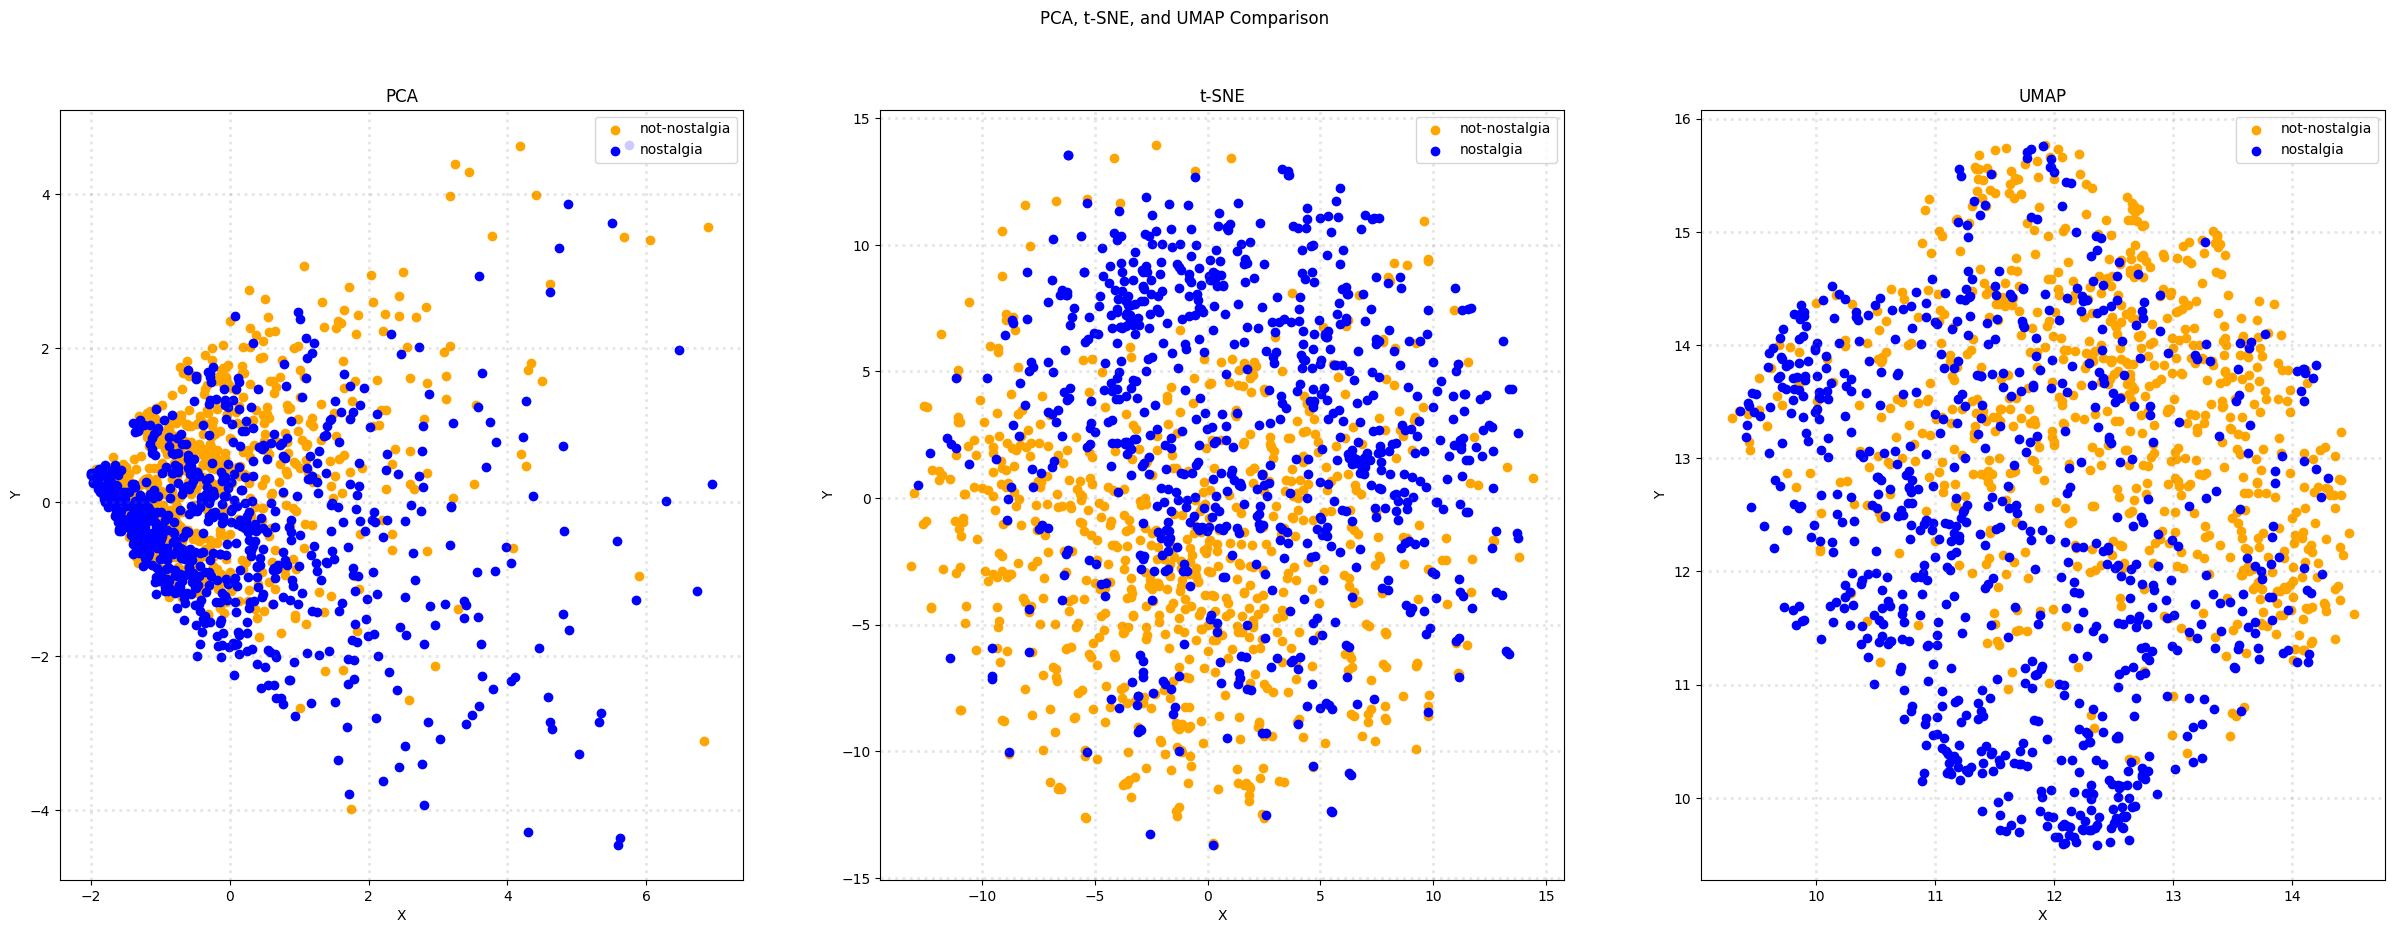

In [24]:
# Plot the results in subplots
col = ['orange', 'blue']
categories = YTC['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, YTC_reduced, title):
    for c, category in zip(col, categories):
        xs = YTC_reduced[YTC['sentiment'] == category].T[0]
        ys = YTC_reduced[YTC['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], YTC_pca_aug, 'PCA')
plot_scatter(axes[1], YTC_tsne_aug, 't-SNE')
plot_scatter(axes[2], YTC_umap_aug, 'UMAP')

plt.show()

In [25]:
#3D dimensionality reduction using PCA, t-SNE, and UMAP
YTC_pca_aug_3D = PCA(n_components=3).fit_transform(augmented_df.values)
YTC_tsne_aug_3D = TSNE(n_components=3).fit_transform(augmented_df.values)
YTC_umap_aug_3D = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

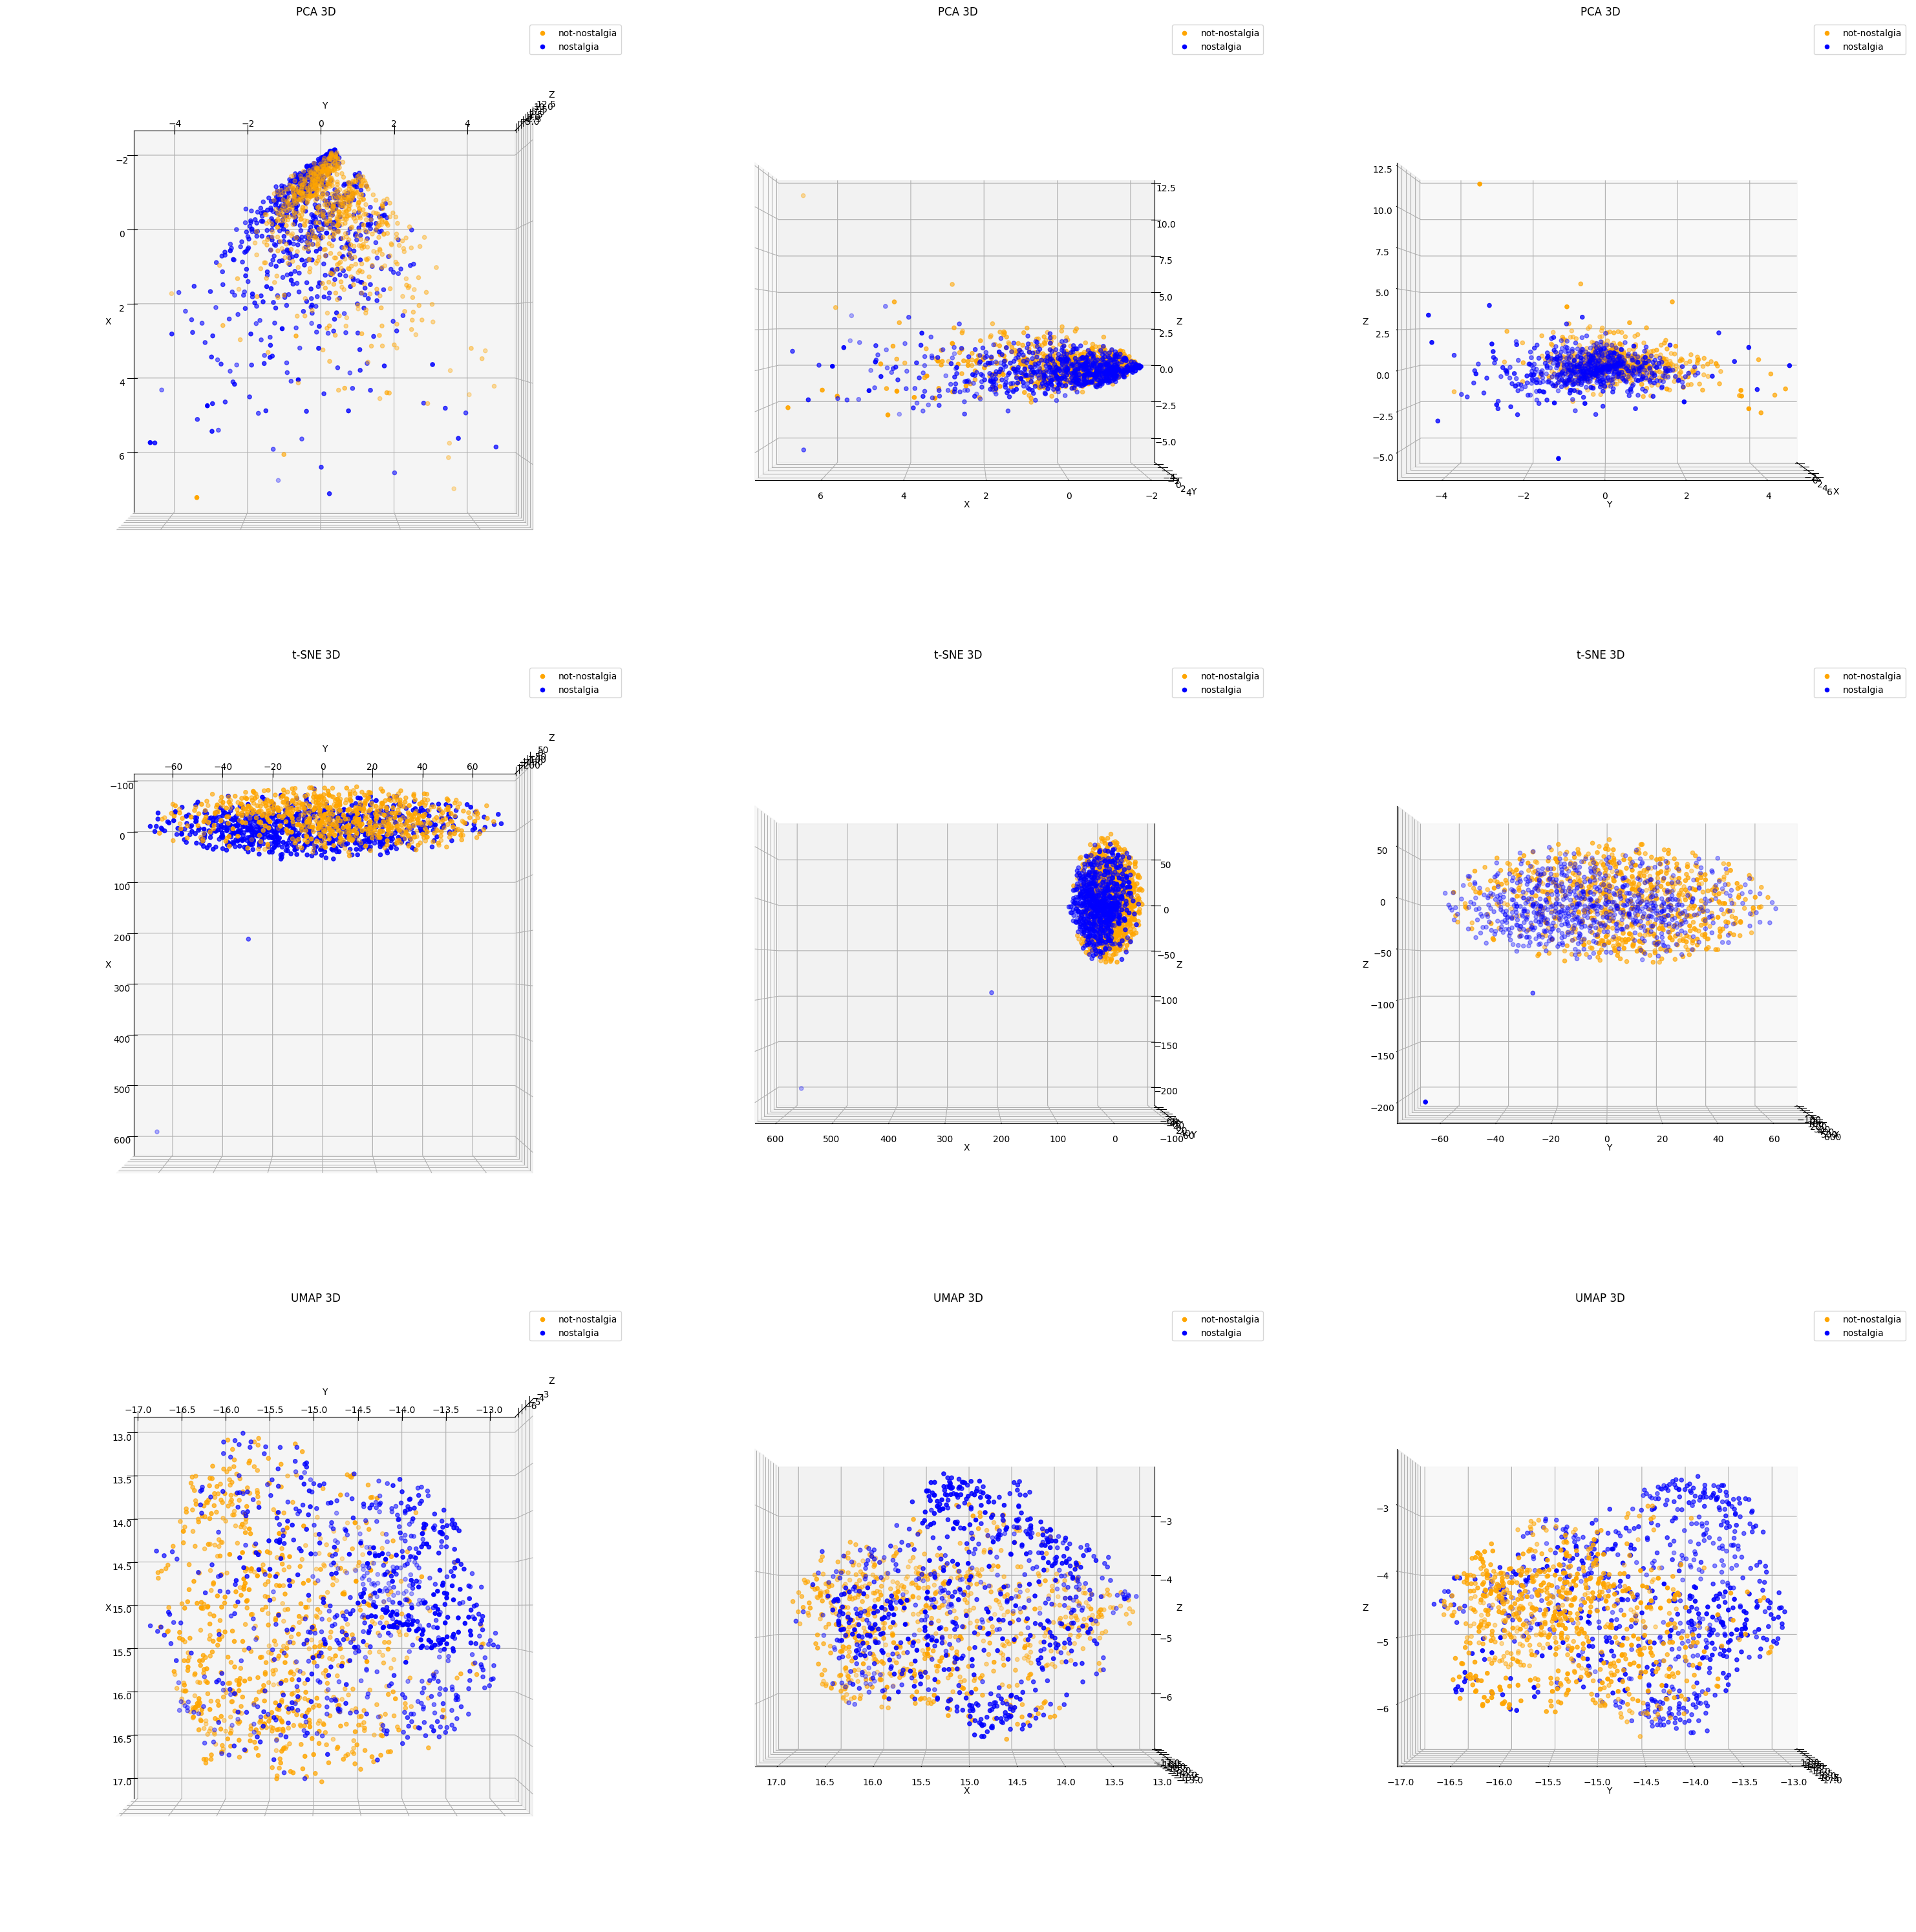

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X is your DataFrame containing the category information
methods = [YTC_pca_aug_3D, YTC_tsne_aug_3D, YTC_umap_aug_3D]
titles = ['PCA 3D', 't-SNE 3D', 'UMAP 3D']
views = [(90, 0), (0, 90), (0, 0)]

def plot_scatter_3D(ax, X_reduced, title):
    col = ['orange', 'blue']
    categories = YTC['sentiment'].unique() 

    for c, category in zip(col, categories):
        xs = X_reduced[YTC['sentiment'] == category].T[0]
        ys = X_reduced[YTC['sentiment'] == category].T[1]
        zs = X_reduced[YTC['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 30), subplot_kw={'projection': '3d'})
for i, method in enumerate(methods):
    for j, view in enumerate(views):
        ax[i][j].view_init(elev=view[0], azim=view[1])  # Set the view angle
        plot_scatter_3D(ax[i][j], method, titles[i])  # Pass method and title

plt.tight_layout()
plt.show()


# Binarization

In [27]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(YTC.sentiment)
YTC['bin_sentiment'] = mlb.transform(YTC.sentiment).tolist()

YTC.head()

,sentiment,comment,tokenized_text,bin_sentiment
0,not-nostalgia,He was a singer with a golden voice that I lov...,"{a, I, still, Reeves, the, with, Jim, singers,...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"{I, a, still, an, kid, when, angel, forgotten,...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"{most, around., smooth, simple, I, a, pretensi...",[0]
3,not-nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"{This, life, 47, man, receive., I, a, Lou., 1s...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"{to, me, songs, mum, reminds, listening, of, h...",[0]


# Data Exploration

In [28]:
document_to_transform_1 = []
random_record_1 = YTC.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = YTC.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = YTC.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [29]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [30]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_248992/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_248992/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_248992/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_248992/452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfo

# Data Classification

In [34]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
YTC['sentiment_id'] = [x[0] for x in YTC['bin_sentiment']]
sentiment_mapping = dict(YTC[['sentiment_id', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, YTC['sentiment'], test_size=0.3, random_state=42)

In [35]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8178    0.9442    0.8765       233
not-nostalgia     0.9282    0.7742    0.8442       217

     accuracy                         0.8622       450
    macro avg     0.8730    0.8592    0.8604       450
 weighted avg     0.8710    0.8622    0.8609       450

